# Лабораторная работа №4
## Метод ветвей и границ. Задача коммивояжера

## Цель работы: 
 <font>Изучить метод ветвей и границ для решения задачи о коммивояжёре дискретного программирования и применить его на практическом примере.</font>

## Ход работы:
<font>1.Решить задачу о коммивояжёре согласно варианту.<br/>2.Написать программу по алгоритму метода ветвей и границ.<br/>3.Проверить верность решения задачи используя любой открытый ресурс. (онлайн или используя пакет прикладных программ)</font>

In [20]:
import numpy as np
import pandas as pd
import networkx as nx
import os
from PIL import Image

## Заданная матрица (вариант 7)

In [2]:
matrix = np.array([[0,1,4,2,6],
          [3,0,6,8,5],
          [3,9,0,3,2],
          [1,1,4,0,5],
          [8,4,2,4,0]], dtype=float)
pd.DataFrame(matrix, columns=[1,2,3,4,5], index=[1,2,3,4,5], dtype=int)

,1,2,3,4,5
1,0,1,4,2,6
2,3,0,6,8,5
3,3,9,0,3,2
4,1,1,4,0,5
5,8,4,2,4,0


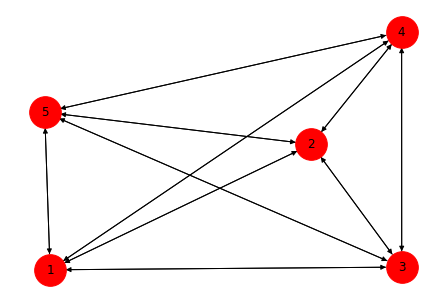

In [3]:
graph = nx.DiGraph()
for i in range(1,6):
    graph.add_node(f'{i}')
edges = set()
for i in range(5):
    for j in range(5):
        edges.add((f'{i+1}', f'{j+1}', matrix[i,j]))
graph.add_weighted_edges_from(edges)
nx.draw(graph,node_color='red',
         node_size=1000,
         with_labels=True)

## Реализация алгоритма границ и ветвей

In [4]:
def branch_porder_method(matrix):
    matrix = matrix.tolist()
    def Min(lst,myindex):
        return min(x for idx, x in enumerate(lst) if idx != myindex)

    def Delete(matrix,index1,index2):
        del matrix[index1]
        for i in matrix:
            del i[index2]
        return matrix

    n=len(matrix)
    H=0
    PathLenght=0
    Str=[]
    Stb=[]
    res=[]
    result=[]
    StartMatrix=[]

    for i in range(n):
        Str.append(i)
        Stb.append(i)

    for i in range(n):StartMatrix.append(matrix[i].copy())

    for i in range(n): matrix[i][i]=float('inf')

    while True:

        for i in range(len(matrix)):
            temp=min(matrix[i])
            H+=temp
            for j in range(len(matrix)):
                matrix[i][j]-=temp

        for i in range(len(matrix)):
            temp = min(row[i] for row in matrix)
            H+=temp
            for j in range(len(matrix)):
                matrix[j][i]-=temp

        NullMax=0
        index1=0
        index2=0
        tmp=0
        for i in range(len(matrix)):
            for j in range(len(matrix)):
                if matrix[i][j]==0:
                    tmp=Min(matrix[i],j)+Min((row[j] for row in matrix),i)
                    if tmp>=NullMax:
                        NullMax=tmp
                        index1=i
                        index2=j

        res.append(Str[index1]+1)
        res.append(Stb[index2]+1)

        oldIndex1=Str[index1]
        oldIndex2=Stb[index2]
        if oldIndex2 in Str and oldIndex1 in Stb:
            NewIndex1=Str.index(oldIndex2)
            NewIndex2=Stb.index(oldIndex1)
            matrix[NewIndex1][NewIndex2]=float('inf')
        del Str[index1]
        del Stb[index2]
        matrix=Delete(matrix,index1,index2)
        if len(matrix)==1:break


    for i in range(0,len(res)-1,2):
        if res.count(res[i])<2:
            result.append(res[i])
            result.append(res[i+1])
    for i in range(0,len(res)-1,2):
        for j in range(0,len(res)-1,2):
            if result[len(result)-1]==res[j]:
                result.append(res[j])
                result.append(res[j+1])
    result.append(result[len(result)-1])
    result.append(result[0])
    path = []
    for i in range(0, len(result)-1 , 2):
        path.append((result[i], result[i+1]))


    for i in range(0,len(result)-1,2):
        if i==len(result)-2:
            PathLenght+=StartMatrix[result[i]-1][result[i+1]-1]
            PathLenght+=StartMatrix[result[i+1]-1][result[0]-1]
        else: PathLenght+=StartMatrix[result[i]-1][result[i+1]-1]
    
    return PathLenght, np.array(path)
    

## Решение задачи

In [10]:
lenght, path = branch_porder_method(matrix)
print('Решение задачи коммивояжера:')
for i,j in path:
    print(f'{i} -> {j} = {matrix[i-1,j-1]}')
print(f'\nОбщая длина пути = {lenght}')

Решение задачи коммивояжера:
2 -> 5 = 5.0
5 -> 3 = 2.0
3 -> 4 = 3.0
4 -> 1 = 1.0
1 -> 2 = 1.0

Общая длина пути = 12.0


## Визуализация решения 

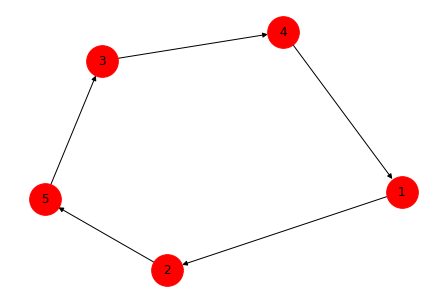

In [6]:
graph = nx.DiGraph()
for i in range(1,6):
    graph.add_node(f'{i}')
edges = set()
for x,y in path:    
    edges.add((f'{x}', f'{y}', matrix[x-1,y-1]))

graph.add_weighted_edges_from(edges)
nx.draw(graph,node_color='red',
         node_size=1000,
         with_labels=True)

## Проверка решения

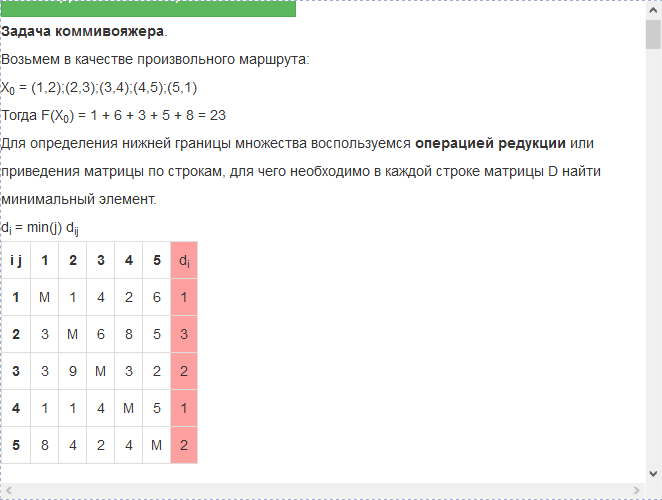

In [23]:
display(Image.open('1.png'))

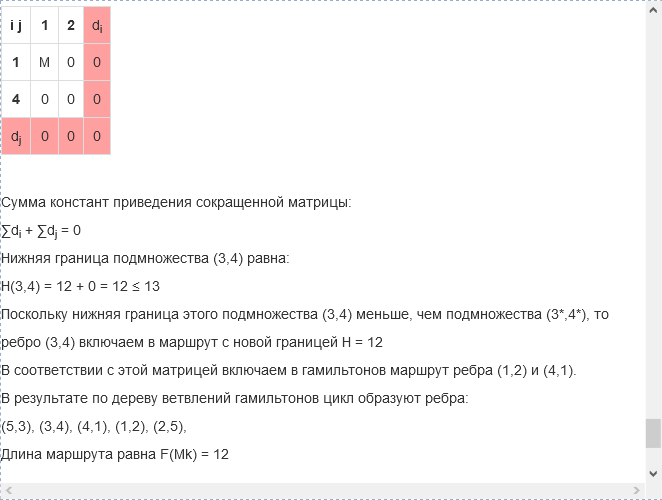

In [22]:
display(Image.open('2.png'))

## Вывод: алгоритм метода ветвей и границ успешно решает задачу коммивояжера. Длина маршрута решения, полученного с помощью написанного алгоритма и с помощью онлайн решения совпадает, следовательно, задача решена верно.